In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [77]:
df=pd.read_csv("/content/Real_Estate.csv")

In [78]:
df


,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [80]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Transaction date'] = encoder.fit_transform(df['Transaction date'])
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,4,8.5,967.4000,6,25.011037,121.479946,21.654710


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    int64  
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [82]:
df.head(10)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,0,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,1,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,3,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,4,8.5,967.4000,6,25.011037,121.479946,21.654710
5,5,13.3,279.1726,2,24.994994,121.543823,36.972376
6,6,38.5,377.7956,3,25.009895,121.558955,27.637382
7,7,15.2,552.4371,5,24.997109,121.544377,44.116585
8,8,24.0,617.4424,3,24.987622,121.527841,49.071247
9,9,13.0,323.6550,8,24.978663,121.483457,43.114353


In [83]:
df.tail(10)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
404,404,13.8,259.66070,1,25.002052,121.528018,44.350623
405,405,21.7,557.47800,9,24.938329,121.522239,37.512993
406,406,16.6,1712.63200,4,24.939884,121.523512,31.692336
407,407,20.6,312.89630,9,24.935167,121.516353,43.588921
408,408,15.1,552.43710,7,24.937444,121.548609,29.721053
409,409,18.3,170.12890,6,24.981186,121.486798,29.096310
410,410,11.9,323.69120,2,24.950070,121.483918,33.871347
411,411,0.0,451.64190,8,24.963901,121.543387,25.255105
412,412,35.9,292.99780,5,24.997863,121.558286,25.285620
413,413,12.0,90.45606,6,24.952904,121.526395,37.580554


In [84]:
df.size
#total no. of elements(7*1000)

2898

In [85]:
df.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0


In [86]:
x=df.drop('House price of unit area',axis=1)
y=df['House price of unit area']

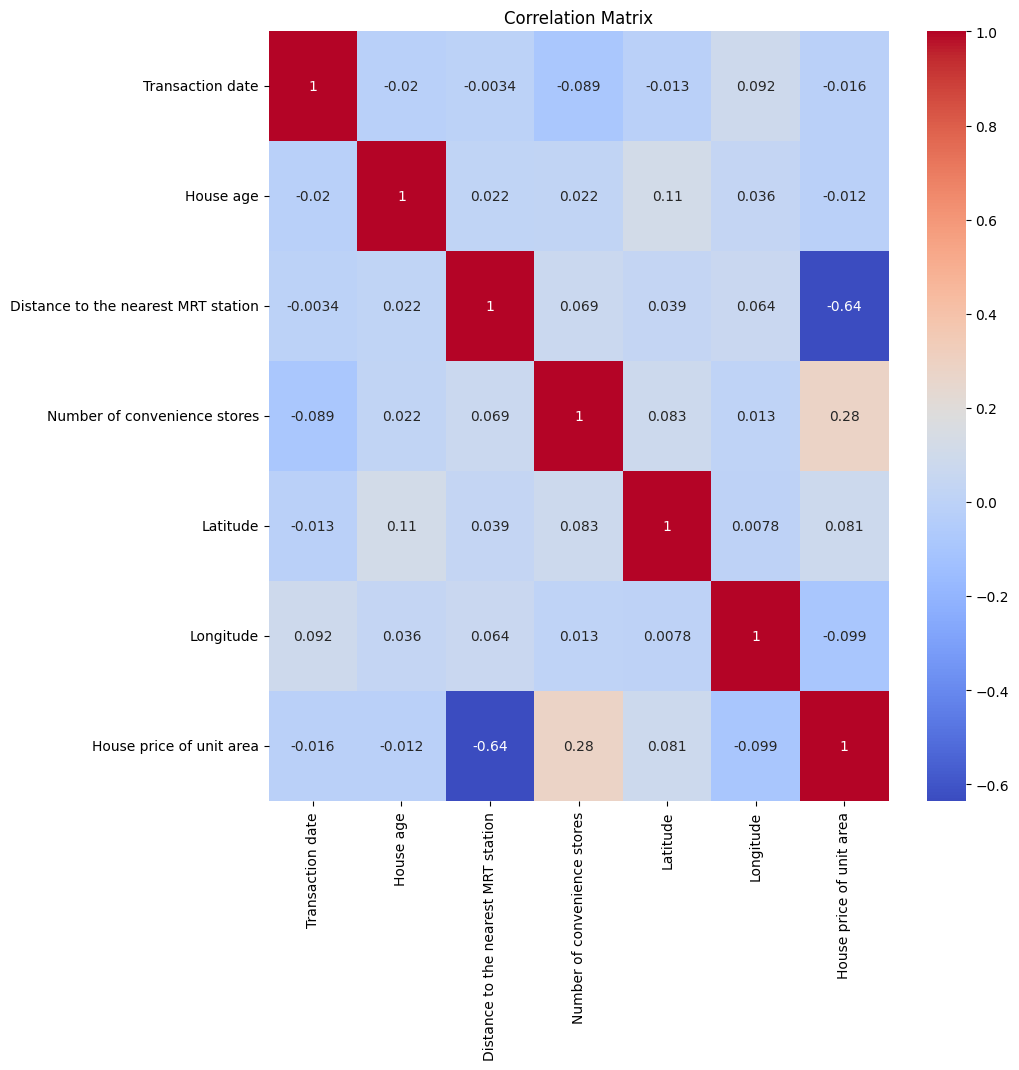

In [87]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(10,10))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

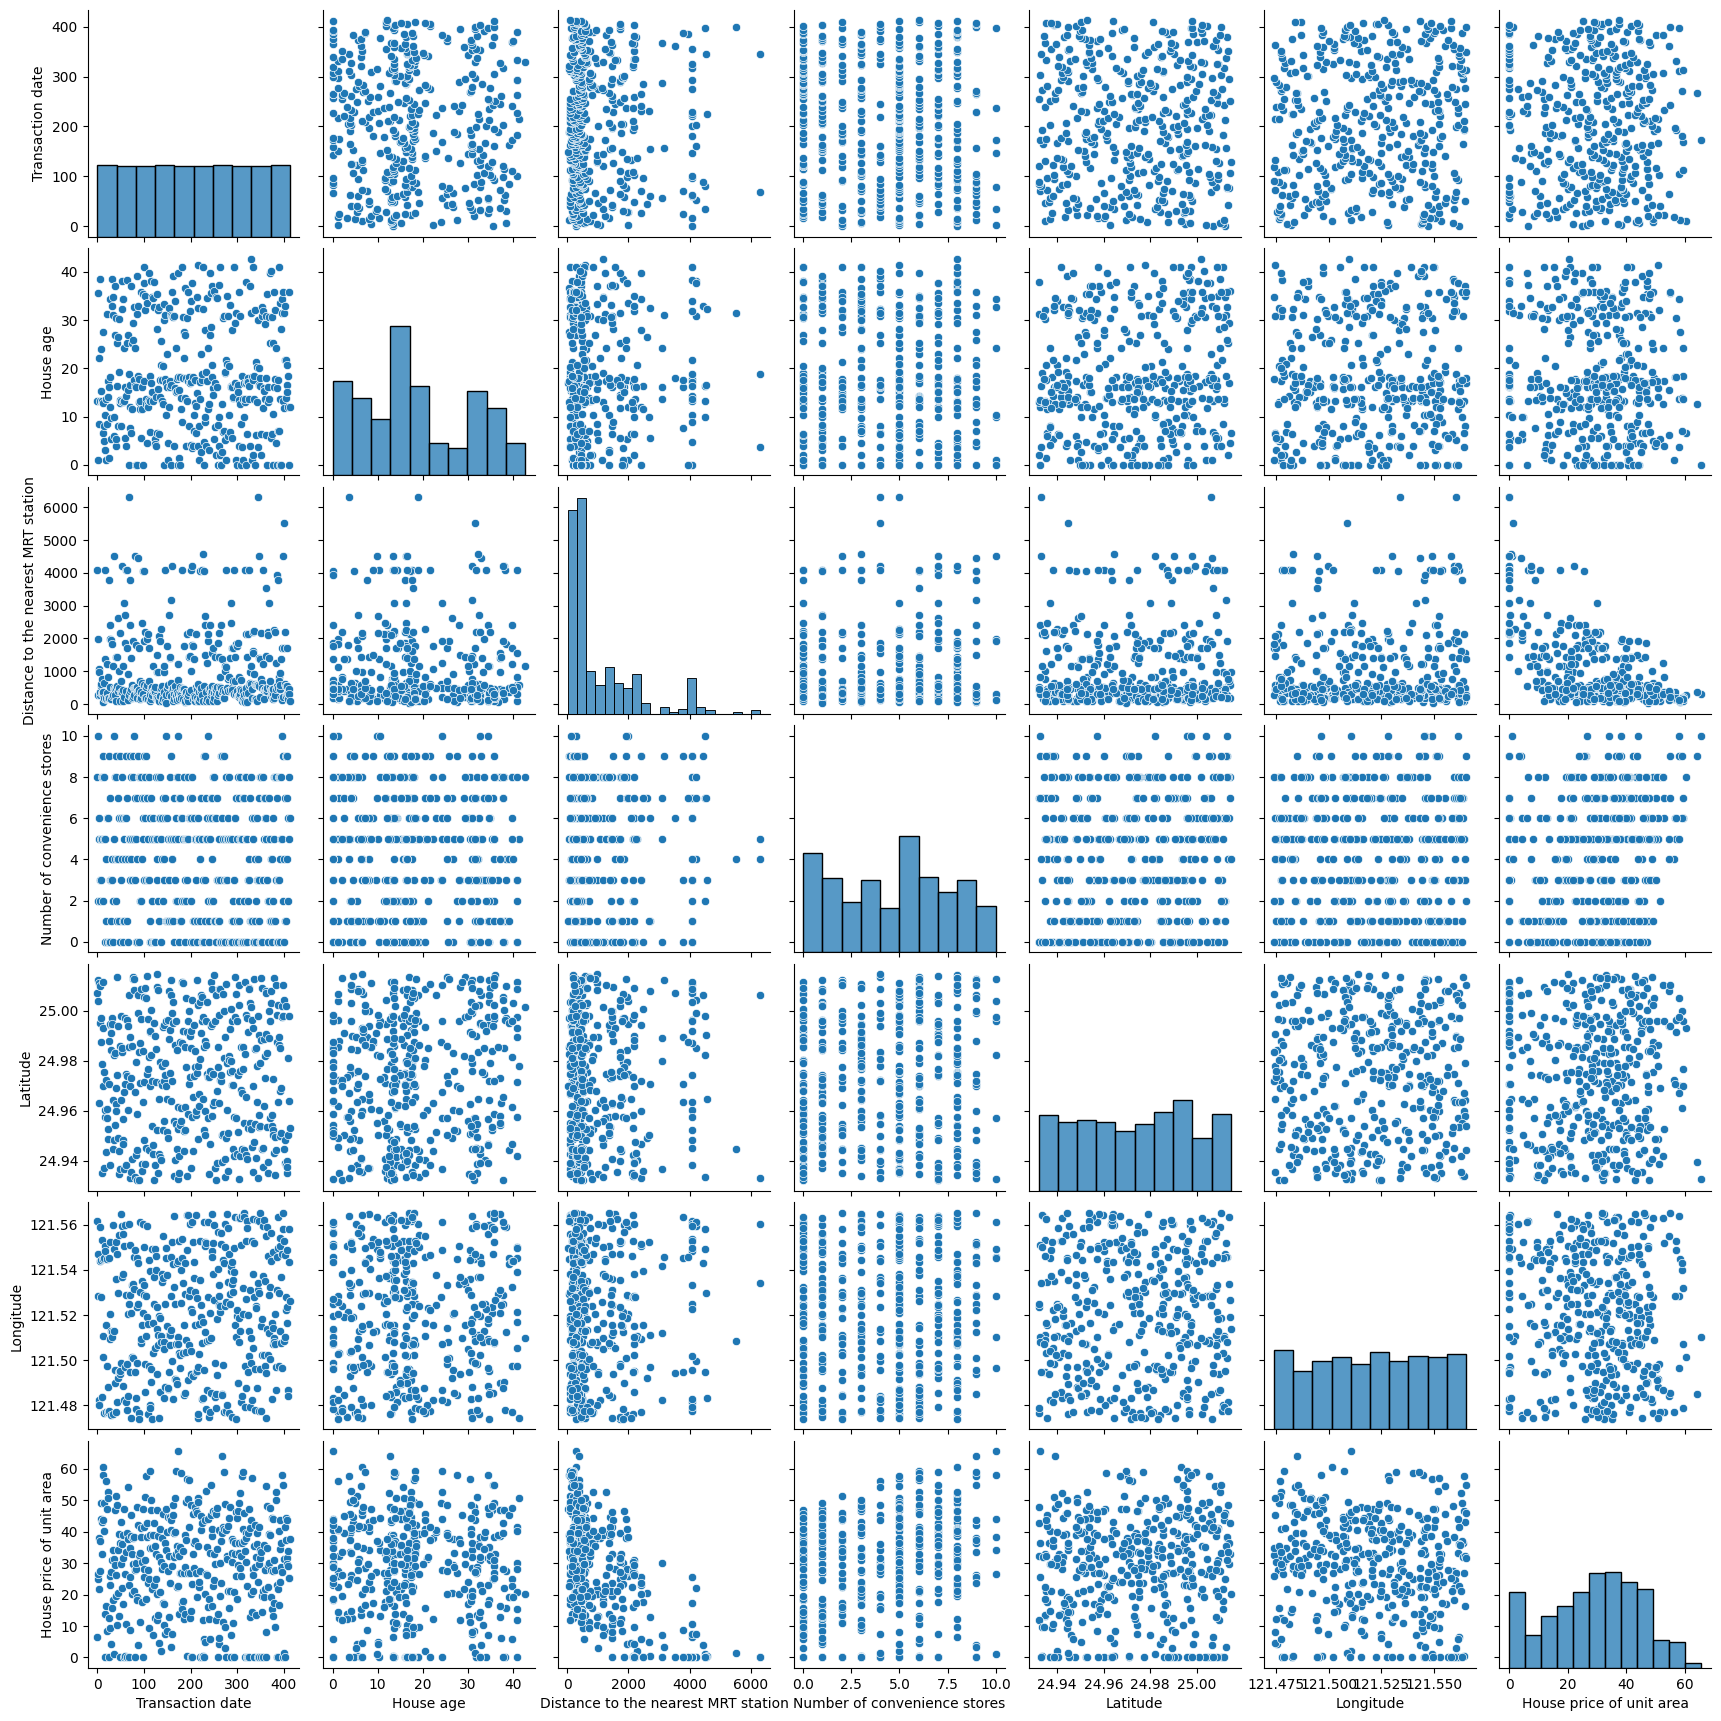

In [88]:
#pairplot to visualize relationship between features

# creating a pairplot for the entire dataframe
sns.pairplot(df)
#This will create scatterplots for each pair of features along with  histrograms for individual features

#display the pairplot

plt.show()


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

                               feature           VIF
0                     Transaction date  4.021807e+00
1                            House age  3.496581e+00
2  Distance to the nearest MRT station  1.802926e+00
3         Number of convenience stores  3.257748e+00
4                             Latitude  1.037385e+06
5                            Longitude  1.036905e+06


In [111]:
x = df.drop(['House price of unit area','House age','Transaction date'], axis=1)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

                               feature           VIF
0  Distance to the nearest MRT station  1.802299e+00
1         Number of convenience stores  3.232568e+00
2                             Latitude  1.025997e+06
3                            Longitude  1.025735e+06


In [113]:



x.head()
#just to check

,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,4082.0150,8,25.007059,121.561694
1,274.0144,2,25.012148,121.546990
2,1978.6710,10,25.003850,121.528336
3,1055.0670,5,24.962887,121.482178
4,967.4000,6,25.011037,121.479946


In [114]:

#Splitting the dataset into training and testing sets(80% train,20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
'''train_test_split function: This function takes the input data (x and y)
 and splits it into four parts.
 test_size=0.2:Here, it's set to 0.2,
  meaning 20% of the data will be used for testing.'''

"train_test_split function: This function takes the input data (x and y)\n and splits it into four parts.\n test_size=0.2:Here, it's set to 0.2,\n  meaning 20% of the data will be used for testing."

In [115]:
#using displot we come to know that we have to use standard distribution
#Normalization the data using StandardScaler (zero mean,unit variance scaling)
scaler=StandardScaler()
#fit and transform the training data
x_train_scaled=scaler.fit_transform(x_train)
#transform the test data
x_test_scaled=scaler.transform(x_test)

In [116]:
x_train_scaled

array([[ 0.8973456 , -0.43313285, -1.63507092,  1.70762426],
       [-0.80554937,  0.28370201,  0.55829294, -1.57139782],
       [-0.64931362, -0.79155027,  0.91530007,  0.9242065 ],
       ...,
       [-0.5127449 , -1.50838513, -0.9238941 ,  0.94994978],
       [-0.4230818 , -1.1499677 , -0.62204248, -1.60010608],
       [ 0.92859994,  0.64211944,  1.49365467, -1.28440316]])

In [117]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [118]:








y_pred_test=model.predict(x_test_scaled)

In [119]:
r2_test=r2_score(y_test,y_pred_test)

In [120]:

''' Calculating Root Mean Squared Error (RMSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_test) # Mean squared error
rmse_test = mse_test ** 0.5 # Root mean squared error'''
# Calculating Root Mean Squared Error (RMSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_test) # Mean squared error
rmse_test = mse_test ** 0.5 # Root mean squared error

In [121]:

#Printing the
print("R-Squared:",r2_test)
print("Root Mean Squared Error:",rmse_test)

R-Squared: 0.5496730640945564
Root Mean Squared Error: 11.161513753762936


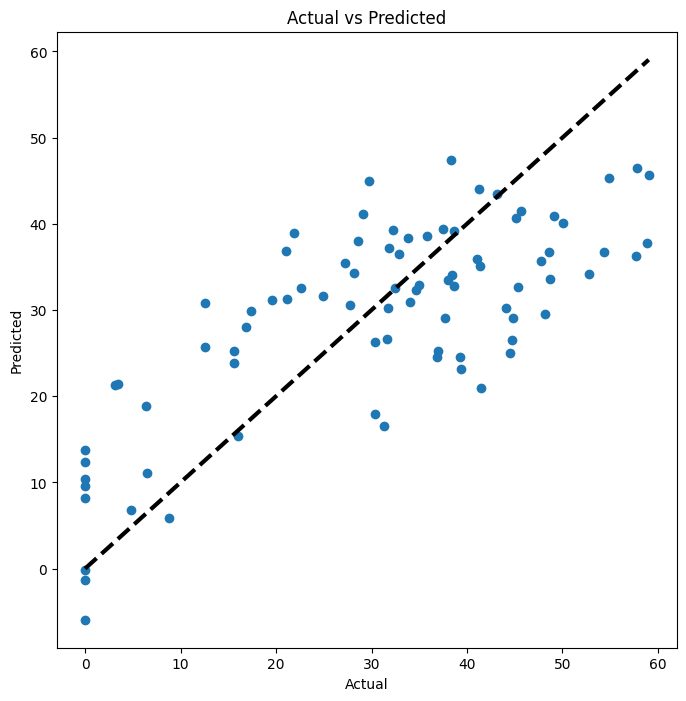

In [122]:
#Plotting Residual (actual vs predicted values)
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [123]:



model.score(x_train_scaled,y_train)

0.5101513056181498

In [124]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [125]:
#LinearRegression mean cross-validation
lm=LinearRegression()
lm.fit(x_train, y_train)
cv=cross_val_score(lm, x_train,y_train,cv=5)
print('LinearRegression')
print(mean(cv))

LinearRegression
0.49729200045495575


In [126]:
#RandomForestRegressor mean cross-validation
rf=RandomForestRegressor(random_state = 1)
rf.fit(x_train, y_train)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print('Random Forest Regressor')
print(mean (cv))

Random Forest Regressor
0.4137466184151288


In [131]:




from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
score_lr = 100*lr_clf.score(x_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 54.9673%
R2 Score :  6.06 %


In [107]:

# prompt: randomforest model score mean cross validation not the r2 score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)
score_rf = 100 * rf_clf.score(x_test, y_test)
print(f'Random Forest Regressor Model score = {score_rf:4.4f}%')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

Random Forest Regressor Model score = 47.3589%
R2 Score :  -6.12 %


In [108]:

# prompt: DEcision tree Regressor model score

from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)
score_dt = 100 * dt_clf.score(x_test, y_test)
print(f'Decision Tree Regressor Model score = {score_dt:4.4f}%')

y_pred_dt = dt_clf.predict(x_test)
R2_Score_dt = round(r2_score(y_pred_dt, y_test) * 100, 2)
print("Decision Tree Regressor R2 Score : ", R2_Score_dt, "%")


Decision Tree Regressor Model score = 5.8908%
Decision Tree Regressor R2 Score :  -19.02 %


In [109]:


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from numpy import mean

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(x_train, y_train)

# Cross-validation score as percentage
cv = cross_val_score(gbr, x_train, y_train, cv=5)
mean_cv_score = mean(cv) * 100
print(f"Mean Cross-Validation Score: {mean_cv_score:.2f}%")

# R2 score as percentage
y_pred_gbr = gbr.predict(x_test)
R2_Score_gbr = round(r2_score(y_pred_gbr, y_test) * 100, 2)
print(f"R2 Score: {R2_Score_gbr}%")

Mean Cross-Validation Score: 42.60%
R2 Score: 10.94%
